In [1]:
from init import *
from helpers_analyses import *


Getting english data
Getting french data
Getting emotion words and bird names
number of overlapping words between Leuven and Rosch: 25
correlation between Leuven and Rosch ratings: (0.9519771567894879, 2.5885716906113406e-13)


In [2]:
# precompute measures
ks = [100]
t1, t2 = 9, -1
pos = NOUN

measures_emotion_eng = {}
for k in ks:
    measures_emotion_eng[k] = nn_measure_over_words(words_eng, pos, pos_data, data, t1, t2, k)


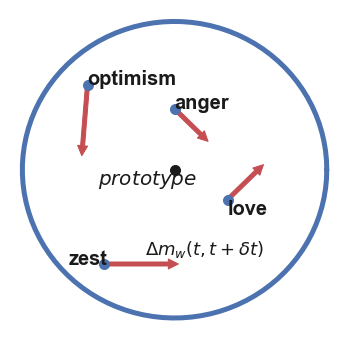

In [4]:
import matplotlib.patches as mpatches
from matplotlib.patches import Ellipse
from math import pi
colours = ['b', 'r', 'g', 'm', 'y', 'c', 'k']
fig1_words = ['anger', 'joy', 'love', 'optimism', 'zest',]
fig1_colours = ['k'] * 6 

u=0.     #x-position of the center
v=0.     #y-position of the center
a=1./2.5**2     #radius on the x-axis
b=1./2.5**2     #radius on the y-axis
a2=1./3.35**2     #radius on the x-axis
b2=1./3.35**2     #radius on the y-axis

fig, ax = plt.subplots(1, 1, sharex=False, sharey=False, figsize=(6, 6))
t = np.linspace(0, 2*pi, 100)
ax.plot(u+a*np.cos(t) , v+b*np.sin(t), linewidth=5, color='b')

ax.scatter([0],[0],color='k',zorder=10,s=100)
ax.annotate(r'$\it{prototype}$', xy=(-0.5*a,-0.1*a), xytext=(-0.5*a,-0.1*a), fontsize=20, color=fig1_colours[0], fontweight='bold', zorder=15)

ds = np.array([proto[w] for w in fig1_words]) ** -2
angles = [pi * 0.5 + pi / 1.5 * i for i in range(3)] + [pi * 3 / 4, -pi * 0.7]
arrow_angles = [-pi/4, pi/2, pi/4, -pi/2 * 1.05, 0]
xs = [d * np.cos(angles[i]) for i, d in enumerate(ds)]
ys = [d * np.sin(angles[i]) for i, d in enumerate(ds)]

for i, w in enumerate(fig1_words):
    if i == 1:
        continue
    x, y = xs[i], ys[i]
    ax.scatter([x], [y], color='b', zorder=10, s=100)
    arrow_len = measures_emotion_eng[k][w] * a / 2
    dx, dy = np.cos(arrow_angles[i]) * arrow_len, np.sin(arrow_angles[i]) * arrow_len
    arrow = mpatches.FancyArrowPatch((x,y), (x+dx,y+dy), mutation_scale=20, color='r')
    ax.add_patch(arrow)
    # adjust text loc and other annotations
    if i == 1:
        x *= 1.4
    if i == 2:
        y *= 1.5
    if i == 4:
        x *= 1.5
        x2, y2 = x+dx,y+dy
        y2 *= 0.9
        ax.annotate(r'$\Delta m_{w}(t,t+\delta t)$', xy=(x2,y2), xytext=(x2,y2), fontsize=18, color=fig1_colours[i], fontweight='bold', zorder=15)
    ax.annotate(w, xy=(x,y), xytext=(x,y), fontsize=20, color=fig1_colours[i], fontweight='bold', zorder=15)

ax.axis('off')
img_format = 'svg'
plt.savefig('images/figure1.'+img_format, format=img_format, bbox_inches='tight')


